In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


command should allow for only folder files to be seen on left side


In [ ]:
# os.chdir('/content/drive/MyDrive/CMPSC445PROJ/UTK_Face/utk_face_cropped') probably will cause errors, can copy straight from file path now that shared drive works properly

test

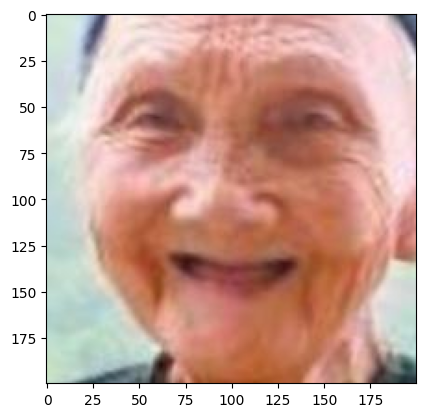

In [ ]:
img = plt.imread('/content/drive/MyDrive/crop_part1/101_1_2_20170105174739309.jpg.chip.jpg')
plt.imshow(img)

comment : would this only accepts the

9780
7824.0
1956.0


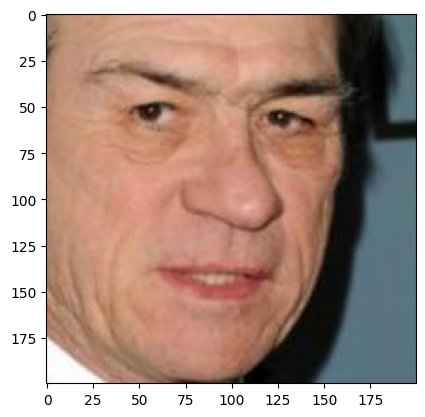

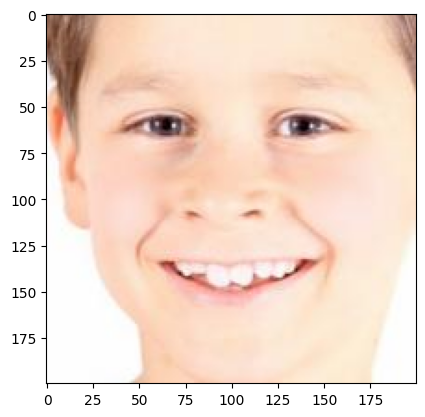

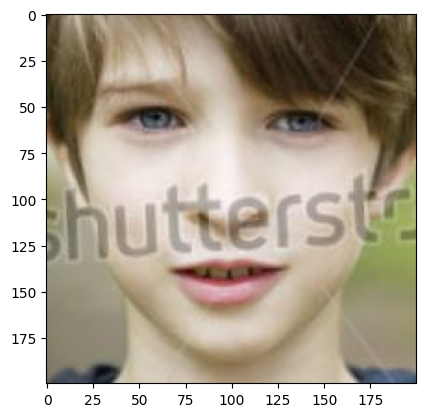

3


In [ ]:
import pathlib

# os.chdir('/content/drive/MyDrive/crop_part1')
img_dir = pathlib.Path('/content/drive/MyDrive/crop_part1')
data_dir = pathlib.Path('/content/drive/MyDrive/crop_part1')

img_count = len(list(img_dir.glob('*.jpg')))
print(img_count)

training_img_count = img_count * 0.8
print(training_img_count)

test_img_count = img_count - training_img_count
print(test_img_count)

img_shown = 0
for image_path in img_dir.glob('*.jpg'):
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.show()
  del img
  img_shown = img_shown + 1
  if img_shown == 3:
    break

print(img_shown)

experimenting using pytorch -- adam

References
 https://www.digitalocean.com/community/tutorials/writing-cnns-from-scratch-in-pytorch

 https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

layers ( input, convolutional, activation function, pooling, flatting, fully connected, output)


1. Convolutional layers ( feature extraction)
-uses kernel/ filter that passes through the image to detect patterns
-patterns include ( edges, textures, curves)
- parameter that it takes as measurement, number of filters, filter size, stride, padding.


2. activation layer (ReLu or sigmoid function, but commonly people uses ReLu)

3.  Pooling layers (
  -to reduce the size of any image while maintaining important features
  -most common types of layer that takes the max and avg pooling value from given size of kernels
  -
  )
3. fully connected layers. (

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image #pillow or python image library for image manipulation
from torchvision import transforms, utils
import torch.nn as nn

Haytham Edits - putting data into dataframe, splitting by genders and age, ***using all images, not doing 80/20 split unless you think i should??? lemme know***

sauce: https://www.kaggle.com/code/eward96/age-and-gender-prediction-on-utkface

In [ ]:
all_images = []
ages = []
genders = []

for i in os.listdir('/content/drive/MyDrive/crop_part1'):
  parts = i.split('_')
  all_images.append(i)
  ages.append(int(parts[0]))
  genders.append(int(parts[1]))

  all_images_df = pd.DataFrame(list(zip(all_images, ages, genders)), columns = ['images', 'age', 'gender'])

  all_images_df.head()

In [ ]:
print(all_images_df)

                                     images  age  gender
0     70_0_0_20170111200011745.jpg.chip.jpg   70       0
1      7_0_0_20170110215708491.jpg.chip.jpg    7       0
2      9_0_0_20170110220236260.jpg.chip.jpg    9       0
3      8_1_0_20170109204542015.jpg.chip.jpg    8       1
4     82_0_0_20170111210449740.jpg.chip.jpg   82       0
...                                     ...  ...     ...
9775  26_0_3_20170105175308269.jpg.chip.jpg   26       0
9776  24_0_3_20170104214521685.jpg.chip.jpg   24       0
9777   1_1_4_20161221192658892.jpg.chip.jpg    1       1
9778   1_0_0_20161219190621290.jpg.chip.jpg    1       0
9779   1_1_3_20161220145200632.jpg.chip.jpg    1       1

[9780 rows x 3 columns]


<ipython-input-125-412b3506b696>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_images_df['age'],kde=True, bins=30)


<Axes: xlabel='age', ylabel='Density'>

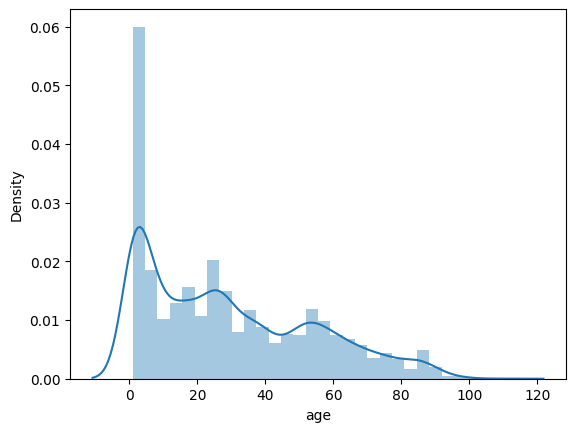

In [ ]:
sns.distplot(all_images_df['age'],kde=True, bins=30)

data skewed towards ages 0-4

In [ ]:
all_images_df[all_images_df['gender'] == 0]['gender'].value_counts()

,count
gender,
0,4372


In [ ]:
all_images_df[all_images_df['gender'] == 1]['gender'].value_counts()

,count
gender,
1,5407


In [ ]:
all_images_df[all_images_df['age'] == 1]['age'].value_counts()

,count
age,
1,1112


In [ ]:
all_images_df[all_images_df['age'] == 2]['age'].value_counts()

,count
age,
2,475


In [ ]:
all_images_df[all_images_df['age'] == 3]['age'].value_counts()

,count
age,
3,284


In [ ]:
all_images_df[all_images_df['age'] == 4]['age'].value_counts()

,count
age,
4,260


In [ ]:
limit = 300 #how many 1 year old images we want

age_1_df = all_images_df[all_images_df['age'] == 1]

age_1_sampled = age_1_df.sample(n=limit, random_state=42) #randomly sample only 'limit' rows from age 1

all_images_df = all_images_df[all_images_df['age'] != 1] #drop the 1 year old rows from the original dataframe

all_images_df = pd.concat([all_images_df, age_1_sampled]) #add the sampled 1 year old rows back to the original dataframe

In [ ]:
all_images_df[all_images_df['age'] == 1]['age'].value_counts()

,count
age,
1,300


<ipython-input-134-01fb8626bc20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_images_df['age'],kde=True, bins=30)


<Axes: xlabel='age', ylabel='Density'>

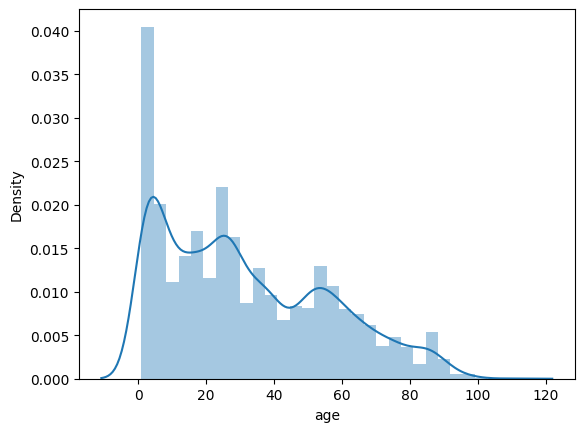

In [ ]:
#looking at the distribution after downsampling
sns.distplot(all_images_df['age'],kde=True, bins=30)

In [ ]:
all_images_df[all_images_df['age'] == 1]['age'].value_counts()

,count
age,
1,300


In [ ]:
all_images_df[all_images_df['age'] == 30]['age'].value_counts()

,count
age,
30,109


In [ ]:
limit = 150 #how many 1 year old images we want

for i in range (1,5):
  age__df = all_images_df[all_images_df['age'] == i]

  age__sampled = age__df.sample(n=limit, random_state=42)

  all_images_df = all_images_df[all_images_df['age'] != i]

  all_images_df = pd.concat([all_images_df, age__sampled])

<ipython-input-138-01fb8626bc20>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_images_df['age'],kde=True, bins=30)


<Axes: xlabel='age', ylabel='Density'>

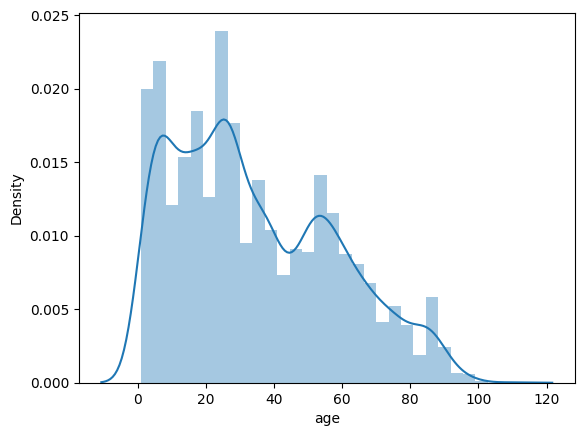

In [ ]:
#looking at the distribution after downsampling
sns.distplot(all_images_df['age'],kde=True, bins=30)

In [ ]:
all_images_df.value_counts()

,,,count
images,age,gender,
9_1_4_20170103213057382.jpg.chip.jpg,9,1,1
100_1_0_20170110183726390.jpg.chip.jpg,100,1,1
100_1_2_20170105174847679.jpg.chip.jpg,100,1,1
101_1_2_20170105174739309.jpg.chip.jpg,101,1,1
10_0_0_20161220222308131.jpg.chip.jpg,10,0,1
...,...,...,...
10_0_0_20170110220255346.jpg.chip.jpg,10,0,1
10_0_0_20170110220251986.jpg.chip.jpg,10,0,1
10_0_0_20170110220235233.jpg.chip.jpg,10,0,1


In [ ]:
class UTKFaceDataset(Dataset):
  def __init__(self, df, img_dir, transform=None):
    self.img_dir = img_dir
    self.df = df
    #self.img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
    self.transform = transform

  def __len__(self):
    return len(self.df)
    #return len(self.img_files)

  #extract img (load and extract label)
  def __getitem__(self, index):
    #img_path = os.path.join(self.img_dir, self.img_files[index])
    img_path = os.path.join(self.img_dir, self.df.iloc[index]['images'])
    img_grayscl = Image.open(img_path).convert('L') # grayscale
    gender = self.df.iloc[index]['gender']
    age = self.df.iloc[index]['age']

    #parts = self.img_files[index].split('_')
    #age, gender = int(parts[0]), int(parts[1])

    if self.transform:
      img_grayscl = self.transform(img_grayscl)
      #img_rgb = self.transform(img_rgb)

    return img_grayscl, age, gender


    #parse file name to age, gender, race
    #filename = self.img_files[index]
    #age, gender, _, _ = filename.split('_')
    #age, gender  = int(age), int(gender)

    #another parsing method
    #images=[]
    #age=[]
    #gender= []
    #age.append(parts[0])
    #gender.append(parts[1])

    #images.append(Image.open(img_path).convert('L'))
    #images.append(Image.open(img_path).convert('RGB'))



    #if self.transform:
      #img_grayscl = self.transform(img_grayscl)
      #img_rgb = self.transform(img_rgb)

    #return img_grayscl, age, gender

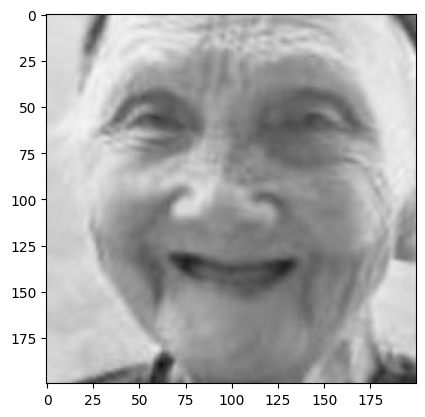

In [ ]:
#individual testing of converting pictures to grayscale
im = np.array(Image.open('/content/drive/MyDrive/crop_part1/101_1_2_20170105174739309.jpg.chip.jpg').convert("I"))
inverted = Image.fromarray(im)
plt.imshow(inverted)

pictures seems to already be in 200x200 size

## To group ages, can change how we group images based on implementation (Ex if we only do 21+- we can do 2 groups)

In [ ]:
def age_grouping(age):
  if age < 10:
    return 1

  elif age < 20:
    return 2

  elif age < 40:
    return 3

  elif age < 60:
    return 4

  else:
    return 5

To make testing results potentially easier:
  - Put all data into groups (age_grouping function)
  - Gender already in 0 for male 1 for female
  - compare model's predicted test results vs actual based on grouping of images

Data Preparation ( splitting into 80% for data training, 20% for testing )

update: check for normalization of data. make sure that it does
-convertion of images to pytorch tensors helps with optimization as well as normalization. It's recommended for high levels ops, so I will do this as part of practise.

https://stackoverflow.com/questions/58897927/why-we-need-tf-convert-to-tensor#:~:text=As%20for%20'why'%20%2D%20long,they%20are%20cast%20to%20tensors.

-

In [ ]:
from torch.utils.data import random_split

#setting up the datapath
dataset_path = '/content/drive/MyDrive/crop_part1'

#Define transformations for consistency in the future, even after cropped
transform = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.ToTensor()
])

#train_transform = transforms.Compose([
#    transforms.Resize((200,200)),
#    transforms.RandomHorizontalFlip(),
#    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
#    transforms.ToTensor(),
#])

#test_transform = transforms.Compose([
#    transforms.Resize((200,200)),
#    transforms.ToTensor(),
#])

# Instantiate the dataset
#dataset = UTKFaceDataset(img_dir=dataset_path, transform=transform)

dataset_from_df = UTKFaceDataset(df=all_images_df, img_dir=dataset_path, transform=transform)
train_size = int(0.8 * len(dataset_from_df))
test_size = len(dataset_from_df) - train_size
all_images_df['age_group'] = all_images_df['age'].apply(age_grouping)
filtered_df = all_images_df.groupby(['age_group', 'gender']).filter(lambda x: len(x) >= 2)
#recommended stratified split (try this steven)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    filtered_df,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=filtered_df[['age_group', 'gender']]  # Stratify by age group and gender
)

print(train_size)
print(test_size)

train_dataset_df, test_dataset_df = random_split(dataset_from_df, [train_size, test_size])

train_loader_df = DataLoader(train_dataset_df, batch_size=16, shuffle=True)
test_loader_df = DataLoader(test_dataset_df, batch_size=16, shuffle=False)

#train_dataset = UTKFaceDataset(img_dir=dataset_path, transform=train_transform)
#test_dataset = UTKFaceDataset(img_dir=dataset_path, transform=test_transform)

#train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



6599
1650


In [ ]:
image, age, gender = dataset_from_df[0]
print(f"image shape: {image.shape}, age: {age}, gender: {gender}")

image shape: torch.Size([1, 200, 200]), age: 70, gender: 0


In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset_from_df))
test_size = len(dataset_from_df) - train_size

train_data, test_data = random_split(dataset_from_df, [train_size, test_size])

0.8 * 20K => expected sample of 16K, missing a large number of images,

update: crop_part1 only contains the around 9780 imges that are cropped, the remaining pictures were never cropped, therfore further preprocessing needed to be done for that.
-action needed: continue with cropped or addone the remaning images?
- we haven't taken a look if wether there is duplication in the picture, do that.

In [ ]:
#print training and testing dataset length
print(f"training size: {len(train_data)} images")
print(f"testing size: {len(test_data)} images")

training size: 6599 images
testing size: 1650 images


In [ ]:
print(f'all files: {len(dataset_from_df)}')


all files: 8249


In [ ]:
#compare
all_files = os.listdir(dataset_path)
jpg_files = [x for x in all_files if x.endswith('.jpg')]
print(f'all jpg pictures: {len(jpg_files)}')

all jpg pictures: 9780


Convolutional Layer

In [ ]:
gender_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size=(3,3), stride = 3, padding = 1, bias = False),
                             nn.BatchNorm2d(32),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=(2,2), stride=2),
                             nn.Conv2d(32, 64, kernel_size=(3,3), stride = 3, padding = 1, bias = False),
                             nn.BatchNorm2d(64),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=(2,2), stride=2),
                             nn.Flatten(),
                             nn.Linear(64 * 5 * 5, 256),
                             nn.ReLU(),
                             nn.Linear(256, 1),
                             nn.Sigmoid()
                             )


Loss Function: BinaryCrossEntropy vs BCEWithLogitsLoss
Activation Function: Tanh vs Sigmoid

The loss with BCE should have values that are between 0.0-1.0

In [ ]:
batch_size = 16
learning_rate = 0.001
epochs = 70

train_loader = DataLoader(train_dataset_df, batch_size=batch_size, shuffle=True)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(gender_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for images, _, genders in train_loader:

    optimizer.zero_grad()

    outputs = gender_model(images)
    outputs = outputs.squeeze()

    loss = criterion(outputs, genders.type(torch.float32))
    loss.backward()
    optimizer.step()

  print(f'epoch: {epoch + 1}, loss: {loss.item()}')


epoch: 1, loss: 0.5096107721328735
epoch: 2, loss: 0.47612181305885315
epoch: 3, loss: 0.6309191584587097
epoch: 4, loss: 0.5853354334831238
epoch: 5, loss: 0.7041793465614319
epoch: 6, loss: 0.6305708885192871
epoch: 7, loss: 0.478779137134552
epoch: 8, loss: 0.5848795175552368


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, test_loader):
  model.eval()
  all_predictions = []
  all_labels = []

  with torch.no_grad():
    for images, _, genders in test_loader:
      outputs = model(images)
      outputs = outputs.squeeze()
      predictions = torch.round(torch.sigmoid(outputs)).int()

      all_predictions.extend(predictions.tolist())
      all_labels.extend(genders.tolist())

  accuracy = accuracy_score(all_labels, all_predictions)
  f1 = f1_score(all_labels, all_predictions, average = 'weighted')
  return accuracy, f1


test_loader = DataLoader(test_dataset_df, batch_size=batch_size, shuffle=True)
accuracy, f1 = evaluate_model(gender_model, test_loader_df)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model F1 Score: {f1:.4f}')


Takes batches from the test data and evulates the models predicted outcome vs actual outcome

In [ ]:

import matplotlib.pyplot as plt
import random
batch_index = random.randint(0, len(test_loader) - 1)
batch_iter = iter(test_loader)
# Get a batch of data from the test loader
for i in range(batch_index+1):
  next(batch_iter)
  images, _, genders = next(batch_iter)
  # Get the model's prediction for the first image in the batch
  if i == 16: break
  output = gender_model(images[i].unsqueeze(0))  # unsqueeze to add batch dimension
  probability = torch.sigmoid(output).item()  # Round to 0 or 1
  prediction = 1 if probability >= 0.52 else 0

  # Display the image and the prediction
  plt.imshow(images[i].squeeze(), cmap='gray')
  plt.title(f"Predicted Gender: {'Female' if prediction == 1 else 'Male'}, Actual Gender: {'Female' if genders[i].item() == 1 else 'Male'}")
  plt.show()

  print(f"Predicted Gender (0=Male, 1=Female): {prediction}")
  print(f"Actual Gender (0=Male, 1=Female): {genders[i].item()}")


In [ ]:
import matplotlib.pyplot as plt

# Get a batch of data from the test loader
images, _, genders = next(iter(test_loader))

# Get the model's prediction for the first image in the batch
output = gender_model(images[13].unsqueeze(0))  # unsqueeze to add batch dimension
print(torch.sigmoid(output))
prediction = torch.round(torch.sigmoid(output)).item()  # Round to 0 or 1

# Display the image and the prediction
plt.imshow(images[13].squeeze(), cmap='gray')
plt.title(f"Predicted Gender: {'Female' if prediction == 1 else 'Male'}, Actual Gender: {'Female' if genders[13].item() == 1 else 'Male'}")
plt.show()

print(f"Raw Output (before rounding): {output.item()}")
print(f"Predicted Gender (0=Male, 1=Female): {prediction}")
print(f"Actual Gender (0=Male, 1=Female): {genders[13].item()}")

***Age Model***

In [ ]:
all_images_df['age_group'] = all_images_df['age'].apply(age_grouping) #using age_grouping method from before


age_model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=(3,3), stride=3, padding=1, bias=False),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Conv2d(32, 64, kernel_size=(3,3), stride=3, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=2),
    nn.Flatten(),
    nn.Linear(64 * 5 * 5, 256),
    nn.ReLU(),
    nn.Linear(256, 5)  #5 age groups
)

In [ ]:
import torch.nn.init as init

for m in age_model.modules():
    if isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

def evaluate_age_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, ages, i in test_loader:

            age_groups = torch.tensor([age_grouping(age.item())-1 for age in ages])

            outputs = model(images)
            i, predicted = torch.max(outputs.data, 1)

            all_predictions.extend(predicted.tolist())
            all_labels.extend(age_groups.tolist())

    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

In [ ]:
age_batch_size = 16
age_epochs = 40
learning_rate = 0.001

criterion_age = nn.CrossEntropyLoss()
optimizer_age = torch.optim.Adam(age_model.parameters(), lr=learning_rate)

for epoch in range(age_epochs):
    age_model.train()
    running_loss = 0.0

    for images, ages, _ in train_loader:
        #convert ages to age groups
        age_groups = torch.tensor([age_grouping(age.item())-1 for age in ages])

        optimizer_age.zero_grad()

        outputs = age_model(images)
        loss = criterion_age(outputs, age_groups)
        loss.backward()
        optimizer_age.step()

        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Age Loss: {running_loss/len(train_loader):.4f}')

NameError: name 'train_loader' is not defined

In [ ]:
def evaluate_age_model(model, test_loader):
  model.eval()
  all_predictions = []
  all_labels = []

  with torch.no_grad():
    for images, ages, i in test_loader:
      age_groups = torch.tensor([age_grouping(age.item())-1 for age in ages])
      outputs = model(images)
      _, predictions = torch.max(outputs.data, 1)

      all_predictions.extend(predictions.tolist())
      all_labels.extend(age_groups.tolist())

  accuracy = accuracy_score(all_labels, all_predictions)
  f1 = f1_score(all_labels, all_predictions, average='weighted')
  return accuracy, f1

accuracy, f1 = evaluate_age_model(age_model, test_loader_df)
print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model F1 Score: {f1:.4f}')


In [ ]:

import matplotlib.pyplot as plt
import random
batch_index = random.randint(0, len(test_loader) - 1)
batch_iter = iter(test_loader)

age_group_mapping = {
    1: '0-9 years',
    2: '10-19 years',
    3: '20-39 years',
    4: '40-59 years',
    5: '60+ years'
}
# Get a batch of data from the test loader
for i in range(batch_index+1):
  images, ages, _ = next(batch_iter)


for i in range (len(images)):
  # Get the model's prediction for the first image in the batch
  output = age_model(images[i].unsqueeze(0))  # unsqueeze to add batch dimension
  _, prediction = torch.max(output,1)
  probability = torch.softmax(output, dim=1)[0][prediction].item()

  predicted_age_range = age_group_mapping[prediction.item() + 1]


  # Display the image and the prediction
  plt.imshow(images[i].squeeze(), cmap='gray')
  plt.title(f"Predicted age: ")
  plt.show()

  print(f"Raw Output (before rounding): {output}")
  print(f"Predicted age range: {predicted_age_range}")
  print(f"Actual Age: ): {ages[i].item()}")
  print(f"Probability: {probability}")


***Still have to evaluate model***

In [ ]:
!pip install tensorflow opencv-python scikit-learn

**CNN RESNET**

In [ ]:
# Import all required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from pathlib import Path
import os
import pandas as pd

# Verify imports
print("All required libraries imported successfully")

print("Preparing dataset for ResNet model with age and gender classification...")


All required libraries imported successfully
Preparing dataset for ResNet model with age and gender classification...


In [ ]:
# Fix for age grouping and index conversion
def age_grouping(age):
    """Convert actual age to group number (1-5)"""
    try:
        age = int(age)  # Ensure age is an integer
        if age < 10:
            return 1
        elif age < 20:
            return 2
        elif age < 40:
            return 3
        elif age < 60:
            return 4
        else:
            return 5
    except (ValueError, TypeError):
        # Default to middle group if age can't be parsed
        return 3

def age_group_to_index(group):
    """Convert group number (1-5) to index (0-4) with validation"""
    try:
        # Convert to 0-based index for PyTorch
        index = int(group) - 1

        # Validate the index is in bounds
        if index < 0:
            index = 0
        elif index > 4:
            index = 4

        return index
    except (ValueError, TypeError):
        # Default to middle group index if group can't be parsed
        return 2

In [ ]:
# Custom transform to handle 'I' mode images
class IntToFloat(object):
    def __call__(self, pic):
        # Convert int32 tensor to float32
        if isinstance(pic, torch.Tensor) and pic.dtype == torch.int32:
            return pic.float() / 65535.0  # Normalize to [0, 1] range (I mode uses 32-bit integers)
        return pic

# Define transforms for intensity images ('I' mode)
train_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    IntToFloat(),  # Convert int32 to float32
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    IntToFloat(),  # Convert int32 to float32
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
class DualTaskDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.img_dir = img_dir
        self.df = df
        self.transform = transform
        # Store the indices as a list for direct access
        self.indices = list(range(len(df)))

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
      try:
          # Get the dataframe row safely
          row = self.df.iloc[idx]

          # Get image path using the exact column name from your dataframe
          img_filename = row['images']
          img_path = os.path.join(self.img_dir, img_filename)

          # Load image as intensity/grayscale ("I" mode)
          img = Image.open(img_path).convert('I')
          age = row['age']
          gender = row['gender']

          # Convert age to group with 0-based indexing and validate bounds
          age_group = age_group_to_index(age_grouping(age))

          # Make sure gender is 0 or 1
          try:
              gender = int(gender) % 2
          except (ValueError, TypeError):
              gender = 0  # Default to 0 if gender can't be parsed

          # Return image, age group, and gender without transformation
          # Transformations will be handled in TransformSubset
          return img, age_group, gender
      except Exception as e:
          print(f"Error processing image at index {idx}: {e}")
          # Create a default response as fallback - return PIL Image for consistency
          dummy_img = Image.new('I', (224, 224), 0)   # Black PIL Image in 'I' mode
          return dummy_img, 2, 0  # Default to middle age group and male gender


In [ ]:
class TransformSubset(Dataset):
    def __init__(self, dataset, indices, transform=None):
        self.dataset = dataset
        self.indices = indices
        self.transform = transform

    def __getitem__(self, idx):
      try:
          # Get the actual index in the original dataset
          actual_idx = self.indices[idx]

          # Get data from the base dataset (includes PIL Image in 'I' mode)
          img, age_group, gender = self.dataset[actual_idx]

          # Apply transform if available and if img is still a PIL image
          if self.transform and isinstance(img, Image.Image):
              # Convert PIL 'I' mode to tensor and handle int32 to float conversion
              img_tensor = transforms.ToTensor()(img)
              # Convert int32 tensor to float32 and normalize
              if img_tensor.dtype == torch.int32:
                  img_tensor = img_tensor.float() / 65535.0  # Normalize to [0, 1]
              # Apply rest of transformations (normalization)
              for t in self.transform.transforms:
                  if not isinstance(t, transforms.ToTensor):
                      img_tensor = t(img_tensor)
              img = img_tensor

          return img, age_group, gender
      except Exception as e:
          print(f"Error in TransformSubset at index {idx}: {e}")
          # Create a default response as fallback
          dummy_img = torch.zeros(1, 224, 224, dtype=torch.float32)
          return dummy_img, 2, 0  # Default to middle age group and male gender

    def __len__(self):
        return len(self.indices)

In [ ]:
def create_datasets(df, img_dir):
    # Use the full dataset without limiting the size
    print(f"Using all {len(df)} images for training and evaluation")

    # Create the base dataset (without transforms yet)
    base_dataset = DualTaskDataset(df=df, img_dir=img_dir, transform=None)

    # Create train/test split indices
    train_size = int(0.8 * len(base_dataset))
    test_size = len(base_dataset) - train_size

    # Create indices manually for more control
    all_indices = list(range(len(base_dataset)))

    # Shuffle indices with a fixed seed for reproducibility
    np.random.seed(42)
    np.random.shuffle(all_indices)

    train_indices = all_indices[:train_size]
    test_indices = all_indices[train_size:]

    print(f"Training size: {len(train_indices)}, Test size: {len(test_indices)}")

    train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # Note: ToTensor is handled explicitly in TransformSubset.__getitem__
    transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # Note: ToTensor is handled explicitly in TransformSubset.__getitem__
    transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Create train and test datasets with proper transforms
    train_data = TransformSubset(base_dataset, train_indices, train_transform)
    test_data = TransformSubset(base_dataset, test_indices, test_transform)

    return train_data, test_data

In [ ]:
class DualTaskResNet(nn.Module):
    def __init__(self, age_classes=5, gender_classes=2):
        super(DualTaskResNet, self).__init__()
        # Load pre-trained ResNet18 (smaller and faster than ResNet50)
        self.resnet = models.resnet18(weights='IMAGENET1K_V1')

        # Modify the first layer to accept grayscale images (1 channel instead of 3)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)####

        # Freeze base layers for faster training
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Get the number of features from the last layer
        num_features = self.resnet.fc.in_features

        # Remove the final fully connected layer
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])

        # Create separate classification heads for age and gender
        self.age_classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, age_classes)
        )

        self.gender_classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, gender_classes)
        )

    def forward(self, x):
        # Extract features from ResNet
        features = self.resnet(x)

        # Age classification
        age_output = self.age_classifier(features)

        # Gender classification
        gender_output = self.gender_classifier(features)

        return age_output, gender_output


In [ ]:
# Training function with progress tracking
def train_dual_model(train_loader, test_loader, model, device, epochs=3):
    print(f"\n--- Training Dual-Task (Age & Gender) Model for {epochs} epochs ---")

    # Initialize loss functions
    age_criterion = nn.CrossEntropyLoss()
    gender_criterion = nn.CrossEntropyLoss()

    # Initialize optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track metrics for plotting
    history = {
        'train_age_loss': [],
        'train_gender_loss': [],
        'train_total_loss': [],
        'train_age_acc': [],
        'train_gender_acc': [],
        'val_age_loss': [],
        'val_gender_loss': [],
        'val_total_loss': [],
        'val_age_acc': [],
        'val_gender_acc': []
    }

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_age_loss = 0.0
        running_gender_loss = 0.0
        running_total_loss = 0.0

        age_correct = 0
        age_total = 0
        gender_correct = 0
        gender_total = 0

        for i, (images, age_labels, gender_labels) in enumerate(train_loader):
            try:
                images = images.to(device)
                age_labels = age_labels.to(device)
                gender_labels = gender_labels.to(device)

                # Forward pass
                age_outputs, gender_outputs = model(images)

                # Calculate losses
                age_loss = age_criterion(age_outputs, age_labels)
                gender_loss = gender_criterion(gender_outputs, gender_labels)

                # Combined loss (you can adjust the weights)
                total_loss = 0.6 * age_loss + 0.4 * gender_loss

                # Backward and optimize
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()

                # Track losses
                running_age_loss += age_loss.item()
                running_gender_loss += gender_loss.item()
                running_total_loss += total_loss.item()

                # Calculate accuracies
                _, age_predicted = torch.max(age_outputs.data, 1)
                age_total += age_labels.size(0)
                age_correct += (age_predicted == age_labels).sum().item()

                _, gender_predicted = torch.max(gender_outputs.data, 1)
                gender_total += gender_labels.size(0)
                gender_correct += (gender_predicted == gender_labels).sum().item()

                # Print progress less frequently for speed
                if (i+1) % 20 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], '
                          f'Loss: {total_loss.item():.4f}, '
                          f'Age Acc: {100 * age_correct/age_total:.2f}%, '
                          f'Gender Acc: {100 * gender_correct/gender_total:.2f}%')
            except Exception as e:
                print(f"Error in training step {i}: {e}")
                continue

        # Calculate average metrics for the epoch
        if len(train_loader) > 0:
            train_age_loss = running_age_loss / len(train_loader)
            train_gender_loss = running_gender_loss / len(train_loader)
            train_total_loss = running_total_loss / len(train_loader)
        else:
            train_age_loss = train_gender_loss = train_total_loss = 0

        if age_total > 0:
            train_age_acc = 100 * age_correct / age_total
        else:
            train_age_acc = 0

        if gender_total > 0:
            train_gender_acc = 100 * gender_correct / gender_total
        else:
            train_gender_acc = 0

        # Store metrics for plotting
        history['train_age_loss'].append(train_age_loss)
        history['train_gender_loss'].append(train_gender_loss)
        history['train_total_loss'].append(train_total_loss)
        history['train_age_acc'].append(train_age_acc)
        history['train_gender_acc'].append(train_gender_acc)

        # Validation phase
        model.eval()
        val_running_age_loss = 0.0
        val_running_gender_loss = 0.0
        val_running_total_loss = 0.0

        val_age_correct = 0
        val_age_total = 0
        val_gender_correct = 0
        val_gender_total = 0

        with torch.no_grad():
            for images, age_labels, gender_labels in test_loader:
                try:
                    images = images.to(device)
                    age_labels = age_labels.to(device)
                    gender_labels = gender_labels.to(device)

                    # Forward pass
                    age_outputs, gender_outputs = model(images)

                    # Calculate losses
                    age_loss = age_criterion(age_outputs, age_labels)
                    gender_loss = gender_criterion(gender_outputs, gender_labels)
                    total_loss = 0.6 * age_loss + 0.4 * gender_loss

                    # Track losses
                    val_running_age_loss += age_loss.item()
                    val_running_gender_loss += gender_loss.item()
                    val_running_total_loss += total_loss.item()

                    # Calculate accuracies
                    _, age_predicted = torch.max(age_outputs.data, 1)
                    val_age_total += age_labels.size(0)
                    val_age_correct += (age_predicted == age_labels).sum().item()

                    _, gender_predicted = torch.max(gender_outputs.data, 1)
                    val_gender_total += gender_labels.size(0)
                    val_gender_correct += (gender_predicted == gender_labels).sum().item()
                except Exception as e:
                    print(f"Error in validation step: {e}")
                    continue

        # Calculate average validation metrics
        if len(test_loader) > 0:
            val_age_loss = val_running_age_loss / len(test_loader)
            val_gender_loss = val_running_gender_loss / len(test_loader)
            val_total_loss = val_running_total_loss / len(test_loader)
        else:
            val_age_loss = val_gender_loss = val_total_loss = 0

        if val_age_total > 0:
            val_age_acc = 100 * val_age_correct / val_age_total
        else:
            val_age_acc = 0

        if val_gender_total > 0:
            val_gender_acc = 100 * val_gender_correct / val_gender_total
        else:
            val_gender_acc = 0

        # Store metrics for plotting
        history['val_age_loss'].append(val_age_loss)
        history['val_gender_loss'].append(val_gender_loss)
        history['val_total_loss'].append(val_total_loss)
        history['val_age_acc'].append(val_age_acc)
        history['val_gender_acc'].append(val_gender_acc)

        # Print epoch results
        print(f'Epoch [{epoch+1}/{epochs}], '
              f'Train: Age Acc: {train_age_acc:.2f}%, Gender Acc: {train_gender_acc:.2f}%, '
              f'Val: Age Acc: {val_age_acc:.2f}%, Gender Acc: {val_gender_acc:.2f}%')

    # Plot training history
    plt.figure(figsize=(15, 10))

    # Plot Age Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history['train_age_acc'], label='Train')
    plt.plot(history['val_age_acc'], label='Validation')
    plt.title('Age Classification Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Gender Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history['train_gender_acc'], label='Train')
    plt.plot(history['val_gender_acc'], label='Validation')
    plt.title('Gender Classification Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Age Loss
    plt.subplot(2, 2, 3)
    plt.plot(history['train_age_loss'], label='Train')
    plt.plot(history['val_age_loss'], label='Validation')
    plt.title('Age Classification Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Gender Loss
    plt.subplot(2, 2, 4)
    plt.plot(history['train_gender_loss'], label='Train')
    plt.plot(history['val_gender_loss'], label='Validation')
    plt.title('Gender Classification Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.savefig('dual_training_history.png')
    plt.show()

    return history

In [ ]:
# Function to evaluate the dual task model
def evaluate_dual_model(test_loader, model, device):
    model.eval()

    all_age_predictions = []
    all_age_targets = []
    all_gender_predictions = []
    all_gender_targets = []

    with torch.no_grad():
        for images, age_labels, gender_labels in test_loader:
            try:
                images = images.to(device)

                # Forward pass
                age_outputs, gender_outputs = model(images)

                # Get predictions
                _, age_predicted = torch.max(age_outputs.data, 1)
                _, gender_predicted = torch.max(gender_outputs.data, 1)

                # Collect all predictions and targets
                all_age_predictions.extend(age_predicted.cpu().numpy())
                all_age_targets.extend(age_labels.numpy())
                all_gender_predictions.extend(gender_predicted.cpu().numpy())
                all_gender_targets.extend(gender_labels.numpy())
            except Exception as e:
                print(f"Error during evaluation: {e}")
                continue

    # Make sure we have predictions to evaluate
    if not all_age_predictions or not all_gender_predictions:
        print("No valid predictions to evaluate.")
        return None

    # Calculate age classification metrics
    age_accuracy = accuracy_score(all_age_targets, all_age_predictions)
    age_precision = precision_score(all_age_targets, all_age_predictions, average='weighted', zero_division=0)
    age_recall = recall_score(all_age_targets, all_age_predictions, average='weighted', zero_division=0)
    age_f1 = f1_score(all_age_targets, all_age_predictions, average='weighted', zero_division=0)

    # Calculate gender classification metrics
    gender_accuracy = accuracy_score(all_gender_targets, all_gender_predictions)
    gender_precision = precision_score(all_gender_targets, all_gender_predictions, average='weighted', zero_division=0)
    gender_recall = recall_score(all_gender_targets, all_gender_predictions, average='weighted', zero_division=0)
    gender_f1 = f1_score(all_gender_targets, all_gender_predictions, average='weighted', zero_division=0)

    # Print metrics
    print("\n--- Age Classification Performance ---")
    print(f"Accuracy: {age_accuracy:.4f}")
    print(f"Precision: {age_precision:.4f}")
    print(f"Recall: {age_recall:.4f}")
    print(f"F1 Score: {age_f1:.4f}")

    print("\n--- Gender Classification Performance ---")
    print(f"Accuracy: {gender_accuracy:.4f}")
    print(f"Precision: {gender_precision:.4f}")
    print(f"Recall: {gender_recall:.4f}")
    print(f"F1 Score: {gender_f1:.4f}")

    # Create confusion matrices
    age_cm = confusion_matrix(all_age_targets, all_age_predictions)
    gender_cm = confusion_matrix(all_gender_targets, all_gender_predictions)

    # Plot age confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        age_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['< 10', '10-19', '20-39', '40-59', '60+'],
        yticklabels=['< 10', '10-19', '20-39', '40-59', '60+']
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Age Classification Confusion Matrix')
    plt.savefig('age_confusion_matrix.png')
    plt.show()

    # Plot gender confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        gender_cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Male', 'Female'],
        yticklabels=['Male', 'Female']
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Gender Classification Confusion Matrix')
    plt.savefig('gender_confusion_matrix.png')
    plt.show()

    # Age classification report
    age_class_names = ['< 10 years', '10-19 years', '20-39 years', '40-59 years', '60+ years']
    gender_class_names = ['Male', 'Female']

    age_report = classification_report(all_age_targets, all_age_predictions,
                                     target_names=age_class_names,
                                     output_dict=True,
                                     zero_division=0)
    gender_report = classification_report(all_gender_targets, all_gender_predictions,
                                        target_names=gender_class_names,
                                        output_dict=True,
                                        zero_division=0)

    age_report_df = pd.DataFrame(age_report).transpose()
    gender_report_df = pd.DataFrame(gender_report).transpose()

    print("\nDetailed Age Classification Report:")
    print(age_report_df.round(3))

    print("\nDetailed Gender Classification Report:")
    print(gender_report_df.round(3))

    # Compare actual vs predicted distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Age distribution
    age_predicted_counts = np.bincount(all_age_predictions, minlength=5)
    age_actual_counts = np.bincount(all_age_targets, minlength=5)

    bar_width = 0.35
    index = np.arange(5)

    ax1.bar(index, age_actual_counts, bar_width, label='Actual', color='blue', alpha=0.7)
    ax1.bar(index + bar_width, age_predicted_counts, bar_width, label='Predicted', color='orange', alpha=0.7)

    ax1.set_xlabel('Age Groups')
    ax1.set_ylabel('Number of Images')
    ax1.set_title('Distribution of Actual vs Predicted Age Groups')
    ax1.set_xticks(index + bar_width/2)
    ax1.set_xticklabels(['< 10', '10-19', '20-39', '40-59', '60+'])
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

    for i, count in enumerate(age_actual_counts):
        ax1.text(i, count + 5, str(count), ha='center', color='blue')

    for i, count in enumerate(age_predicted_counts):
        ax1.text(i + bar_width, count + 5, str(count), ha='center', color='orange')

    # Gender distribution
    gender_predicted_counts = np.bincount(all_gender_predictions, minlength=2)
    gender_actual_counts = np.bincount(all_gender_targets, minlength=2)

    bar_width = 0.35
    index = np.arange(2)

    ax2.bar(index, gender_actual_counts, bar_width, label='Actual', color='blue', alpha=0.7)
    ax2.bar(index + bar_width, gender_predicted_counts, bar_width, label='Predicted', color='orange', alpha=0.7)

    ax2.set_xlabel('Gender')
    ax2.set_ylabel('Number of Images')
    ax2.set_title('Distribution of Actual vs Predicted Gender')
    ax2.set_xticks(index + bar_width/2)
    ax2.set_xticklabels(['Male', 'Female'])
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

    for i, count in enumerate(gender_actual_counts):
        ax2.text(i, count + 5, str(count), ha='center', color='blue')

    for i, count in enumerate(gender_predicted_counts):
        ax2.text(i + bar_width, count + 5, str(count), ha='center', color='orange')

    plt.tight_layout()
    plt.savefig('prediction_distributions.png')
    plt.show()

    return {
        'age': {
            'accuracy': age_accuracy,
            'precision': age_precision,
            'recall': age_recall,
            'f1': age_f1,
            'confusion_matrix': age_cm,
            'report': age_report_df
        },
        'gender': {
            'accuracy': gender_accuracy,
            'precision': gender_precision,
            'recall': gender_recall,
            'f1': gender_f1,
            'confusion_matrix': gender_cm,
            'report': gender_report_df
        }
    }

In [ ]:
def predict_age_gender(model, image_path, device):
    # Ensure model is in evaluation mode
    model.eval()

    try:
        # Load and preprocess image with "I" (intensity) mode
        image = Image.open(image_path).convert('I')

        # Explicitly handle the conversion from I mode to a proper float tensor
        image_tensor = transforms.Resize((224, 224))(image)  # Resize to 224×224
        image_tensor = transforms.ToTensor()(image_tensor)  # Convert to tensor

        # Handle int32 to float conversion for I mode
        if image_tensor.dtype == torch.int32:
            image_tensor = image_tensor.float() / 65535.0  # Normalize I mode values

        # Apply normalization
        image_tensor = transforms.Normalize(mean=[0.5], std=[0.5])(image_tensor)

        # Add batch dimension
        image_tensor = image_tensor.unsqueeze(0).to(device)

        # Make prediction
        with torch.no_grad():
            age_outputs, gender_outputs = model(image_tensor)

            # Get age prediction
            _, age_predicted = torch.max(age_outputs, 1)
            age_probabilities = torch.nn.functional.softmax(age_outputs, dim=1)
            age_confidence = age_probabilities[0][age_predicted.item()].item()

            # Get gender prediction
            _, gender_predicted = torch.max(gender_outputs, 1)
            gender_probabilities = torch.nn.functional.softmax(gender_outputs, dim=1)
            gender_confidence = gender_probabilities[0][gender_predicted.item()].item()

        # Adjust the age indexing back to 1-based for display
        age_group = age_predicted.item() + 1

        # Map predictions to human-readable descriptions
        age_group_mapping = {
            1: "< 10 years",
            2: "10-19 years",
            3: "20-39 years",
            4: "40-59 years",
            5: "60+ years"
        }

        gender_mapping = {
            0: "Male",
            1: "Female"
        }

        # Create result strings
        age_result = f"Age Group: {age_group_mapping[age_group]} (Confidence: {age_confidence:.2f})"
        gender_result = f"Gender: {gender_mapping[gender_predicted.item()]} (Confidence: {gender_confidence:.2f})"

        # Display image with predictions - use grayscale for display purposes
        img = np.array(Image.open(image_path).convert('L'))  # Load as grayscale for display
        plt.figure(figsize=(6, 6))
        plt.imshow(img, cmap='gray')  # Use grayscale colormap
        plt.title(f"{age_result}\n{gender_result}")
        plt.axis('off')
        plt.show()

        return age_result, gender_result
    except Exception as e:
        print(f"Error predicting for image {image_path}: {e}")
        return "Error in prediction", "Error in prediction"


Using all 8249 images for training and evaluation
Training size: 6599, Test size: 1650
Using device: cpu

--- Training Dual-Task (Age & Gender) Model for 3 epochs ---
Epoch [1/3], Step [20/104], Loss: 1.2072, Age Acc: 30.16%, Gender Acc: 58.44%
Epoch [1/3], Step [40/104], Loss: 1.1664, Age Acc: 31.48%, Gender Acc: 60.98%
Epoch [1/3], Step [60/104], Loss: 1.1256, Age Acc: 32.50%, Gender Acc: 61.77%
Epoch [1/3], Step [80/104], Loss: 1.1012, Age Acc: 32.81%, Gender Acc: 62.27%
Epoch [1/3], Step [100/104], Loss: 1.1727, Age Acc: 33.59%, Gender Acc: 62.92%
Epoch [1/3], Train: Age Acc: 33.85%, Gender Acc: 63.19%, Val: Age Acc: 34.97%, Gender Acc: 67.52%
Epoch [2/3], Step [20/104], Loss: 1.1181, Age Acc: 38.12%, Gender Acc: 63.44%
Epoch [2/3], Step [40/104], Loss: 1.1159, Age Acc: 37.11%, Gender Acc: 64.88%
Epoch [2/3], Step [60/104], Loss: 1.1735, Age Acc: 37.34%, Gender Acc: 64.40%
Epoch [2/3], Step [80/104], Loss: 1.0998, Age Acc: 36.60%, Gender Acc: 64.53%
Epoch [2/3], Step [100/104], Los

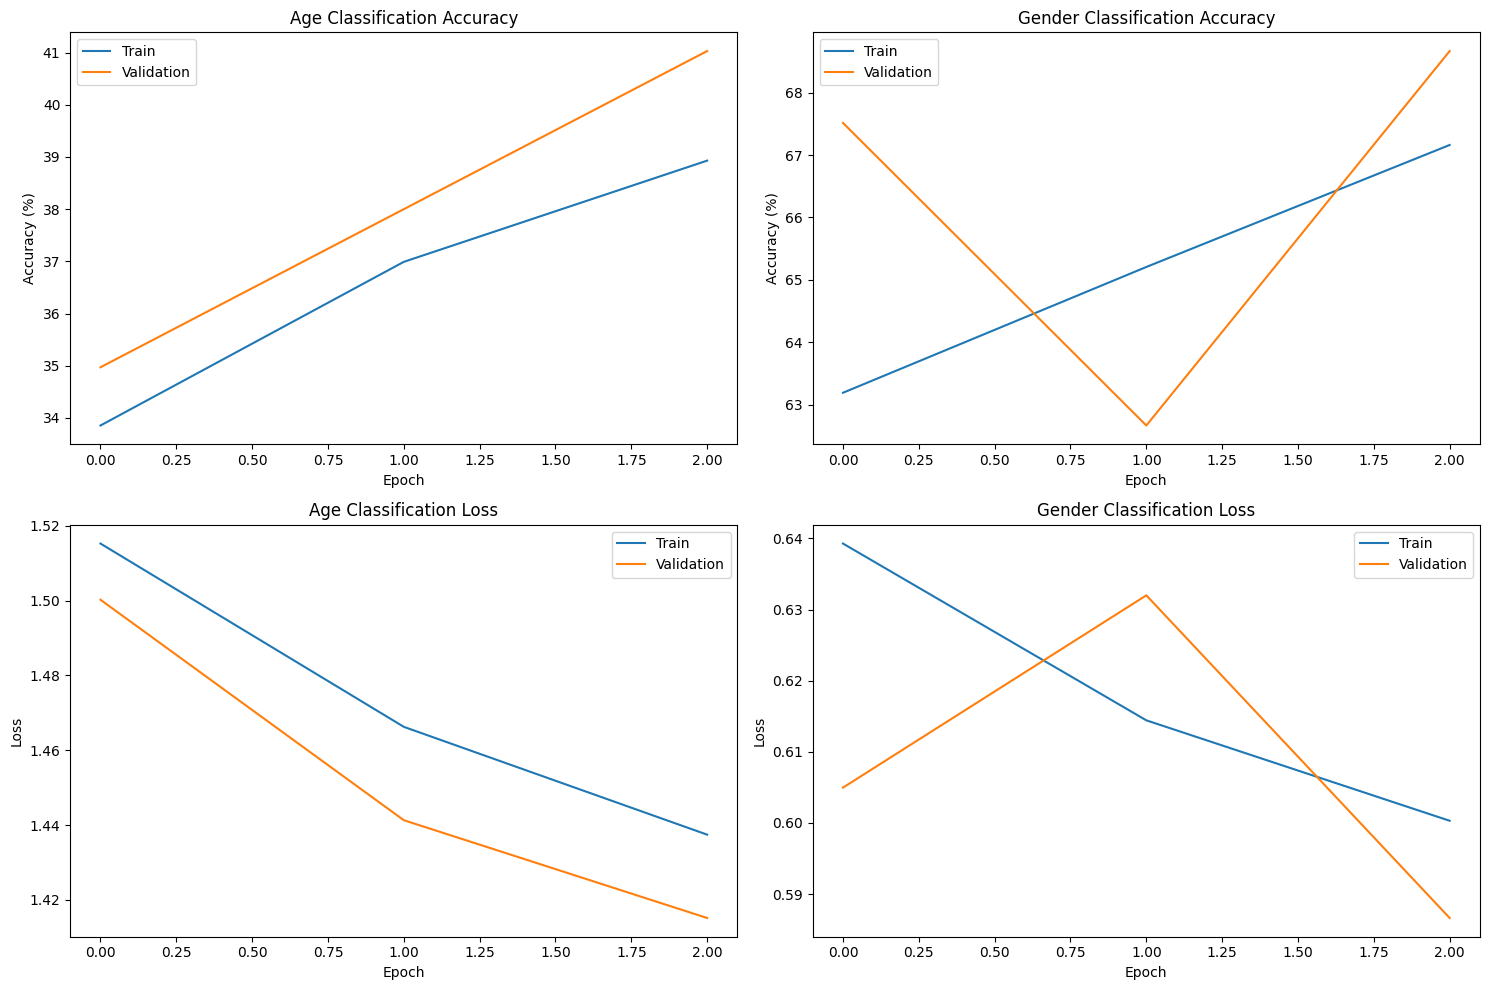


--- Age Classification Performance ---
Accuracy: 0.4103
Precision: 0.3504
Recall: 0.4103
F1 Score: 0.3594

--- Gender Classification Performance ---
Accuracy: 0.6867
Precision: 0.6933
Recall: 0.6867
F1 Score: 0.6886


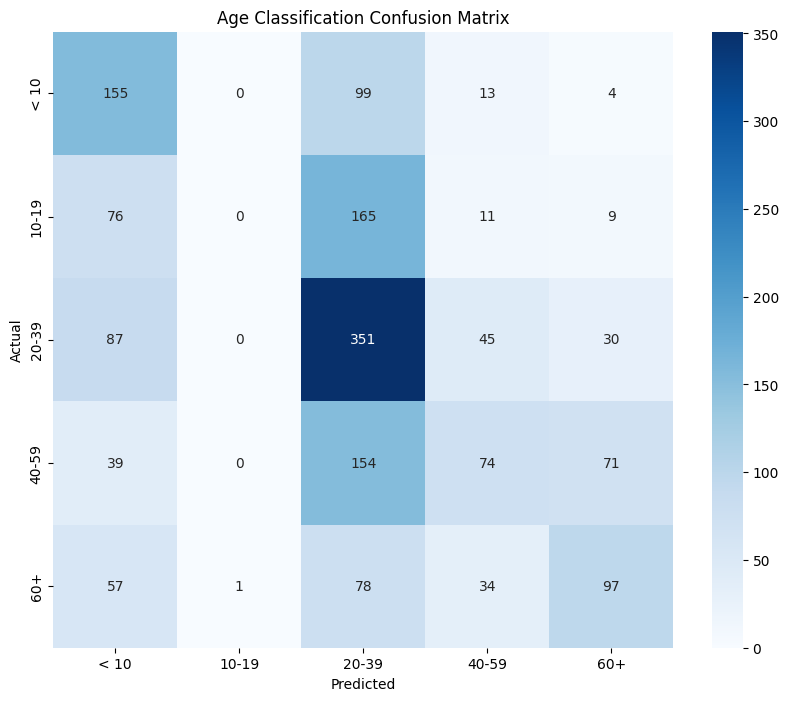

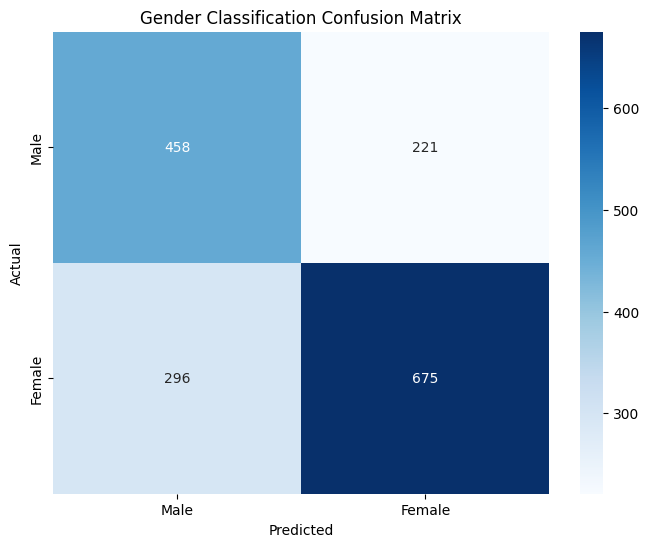


Detailed Age Classification Report:
              precision  recall  f1-score  support
< 10 years        0.374   0.572     0.453   271.00
10-19 years       0.000   0.000     0.000   261.00
20-39 years       0.414   0.684     0.516   513.00
40-59 years       0.418   0.219     0.287   338.00
60+ years         0.460   0.363     0.406   267.00
accuracy          0.410   0.410     0.410     0.41
macro avg         0.333   0.368     0.332  1650.00
weighted avg      0.350   0.410     0.359  1650.00

Detailed Gender Classification Report:
              precision  recall  f1-score   support
Male              0.607   0.675     0.639   679.000
Female            0.753   0.695     0.723   971.000
accuracy          0.687   0.687     0.687     0.687
macro avg         0.680   0.685     0.681  1650.000
weighted avg      0.693   0.687     0.689  1650.000


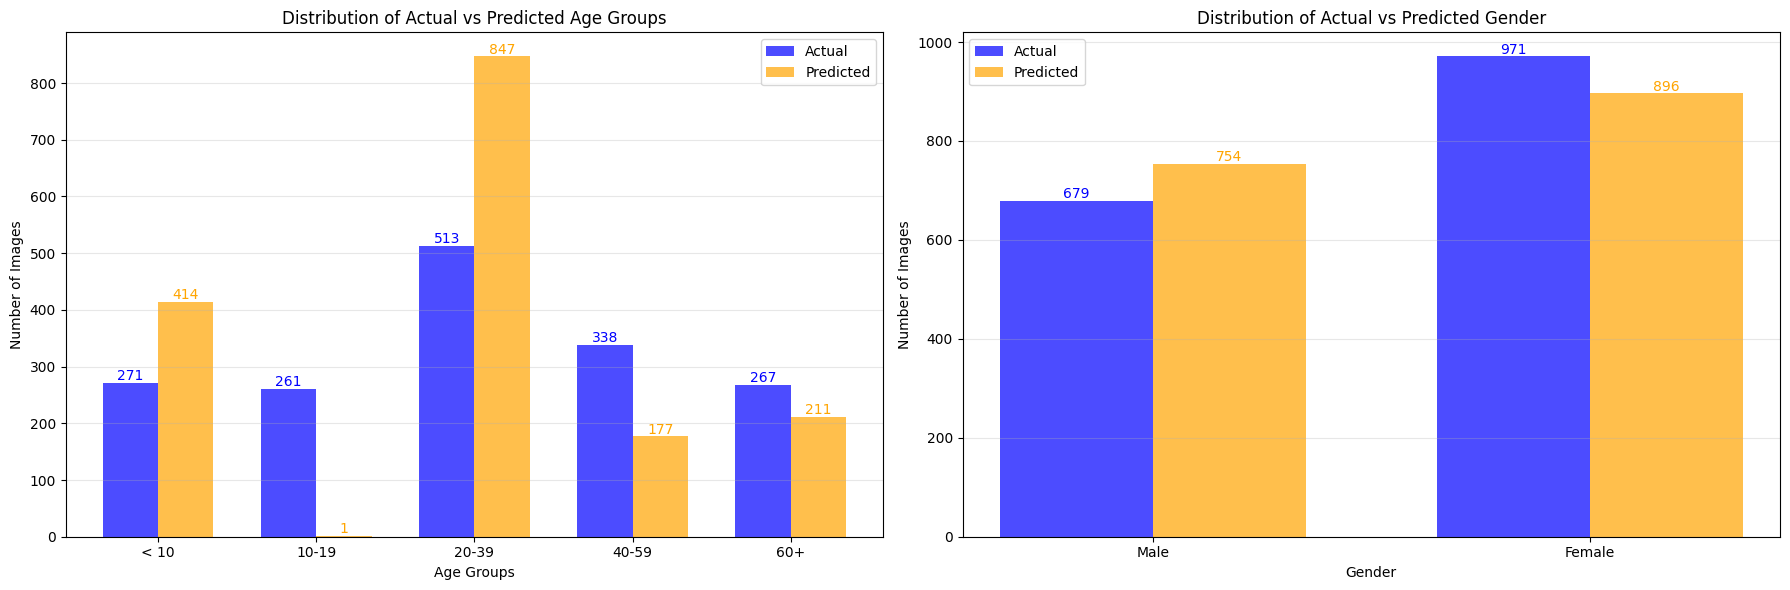

Model saved as 'dual_age_gender_model.pth'

Predicting age and gender for 70_0_0_20170111200011745.jpg.chip.jpg


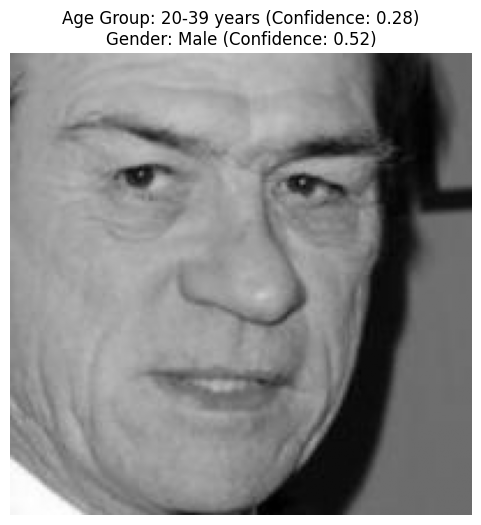

Age Group: 20-39 years (Confidence: 0.28)
Gender: Male (Confidence: 0.52)

Predicting age and gender for 7_0_0_20170110215708491.jpg.chip.jpg


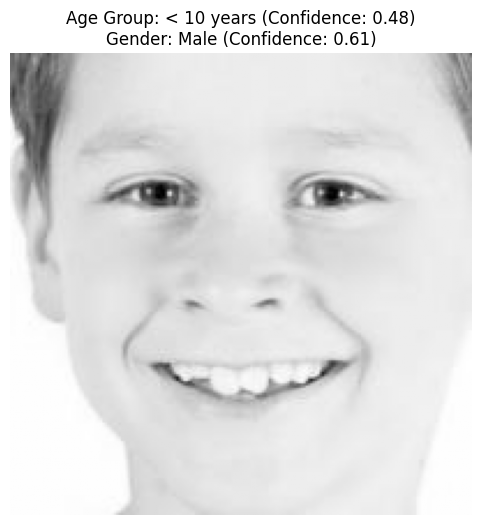

Age Group: < 10 years (Confidence: 0.48)
Gender: Male (Confidence: 0.61)

Predicting age and gender for 9_0_0_20170110220236260.jpg.chip.jpg


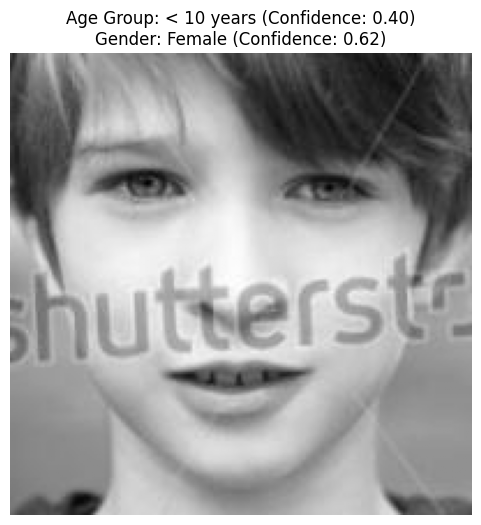

Age Group: < 10 years (Confidence: 0.40)
Gender: Female (Confidence: 0.62)

Predicting age and gender for 8_1_0_20170109204542015.jpg.chip.jpg


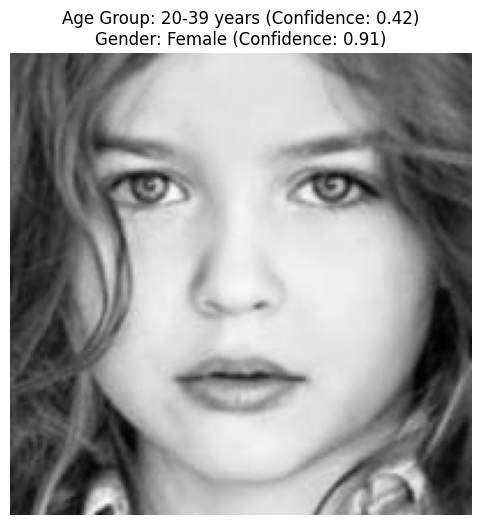

Age Group: 20-39 years (Confidence: 0.42)
Gender: Female (Confidence: 0.91)

Predicting age and gender for 82_0_0_20170111210449740.jpg.chip.jpg


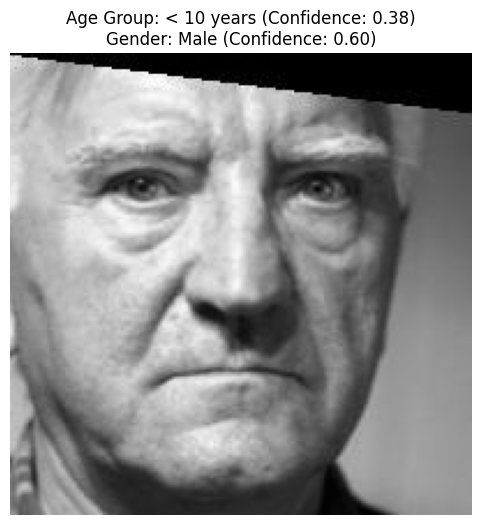

Age Group: < 10 years (Confidence: 0.38)
Gender: Male (Confidence: 0.60)


In [ ]:
# Main execution code
def main():
    try:
        # Create datasets using all available images
        train_data, test_data = create_datasets(
            df=all_images_df,
            img_dir=dataset_path
        )

        # Create DataLoaders - you can adjust batch size if needed
        batch_size = 64  # Increase for faster training if you have enough memory
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

        # Initialize device
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        # Initialize model
        dual_model = DualTaskResNet(age_classes=5, gender_classes=2).to(device)

        # Train the model
        history = train_dual_model(train_loader, test_loader, dual_model, device, epochs=3)

        # Evaluate model performance
        results = evaluate_dual_model(test_loader, dual_model, device)

        # Save the model
        torch.save(dual_model.state_dict(), 'dual_age_gender_model.pth')
        print("Model saved as 'dual_age_gender_model.pth'")

        # Test on a few sample images
        test_samples = list(Path(dataset_path).glob('*.jpg'))[:5]  # First 5 images
        for sample in test_samples:
            print(f"\nPredicting age and gender for {sample.name}")
            age_result, gender_result = predict_age_gender(dual_model, sample, device)
            print(age_result)
            print(gender_result)
    except Exception as e:
        print(f"Error in main execution: {e}")

# Run the main function if script is executed directly
if __name__ == "__main__":
    main()